# Identifying Sentiments (Part 5)

This section uses VADER, word2vec and TextBlob.
VADER is typically used for sentiment analysis; here the negative, positive, neutral and compound predictions for each tweet is used to check the relation with the class label in this data sets. In additon, the similarities in the vectorization of each tweet by wordsvec is checked against the class label. The TextBlob that was shown in the Part 3 is also used. The results of each of these models are used as features into different machine learning algorithms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
% matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from textblob import TextBlob
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel

import spacy
# nlp = spacy.load('en_core_web_sm')
nlp = spacy.load('en_core_web_lg')

from nltk.stem.snowball import SnowballStemmer

import random
random.seed (1)

train = pd.read_csv('Train_Data.csv')
test = pd.read_csv('Test_Data.csv')

C:\Users\9020\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\9020\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
pd.set_option('display.max_colwidth', 1000)

In [3]:
train.head(2)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/


In [4]:
test.head(2)

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\9020\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
# Instantiating the sentiment intensity analyzer from VADER
sid = SentimentIntensityAnalyzer()

In [8]:
# Getting the VADER sentiment parameters for each tweet
train['scores'] = train['tweet'].apply(lambda tweet: sid.polarity_scores(tweet))
test['scores'] = test['tweet'].apply(lambda tweet: sid.polarity_scores(tweet))

train['neg'] = train['scores'].apply(lambda scores: scores['neg'])
test['neg'] = test['scores'].apply(lambda scores: scores['neg'])

train['neu'] = train['scores'].apply(lambda scores: scores['neu'])
test['neu'] = test['scores'].apply(lambda scores: scores['neu'])

train['pos'] = train['scores'].apply(lambda scores: scores['pos'])
test['pos'] = test['scores'].apply(lambda scores: scores['pos'])

train['compound'] = train['scores'].apply(lambda scores: scores['compound'])
test['compound'] = test['scores'].apply(lambda scores: scores['compound'])

In [9]:
train.head(2)

,id,label,tweet,scores,neg,neu,pos,compound
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0,1.000,0.000,0.0000
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.7096}",0.0,0.704,0.296,0.7096


In [10]:
test.head(2)

,id,tweet,scores,neg,neu,pos,compound
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks,"{'neg': 0.36, 'neu': 0.64, 'pos': 0.0, 'compound': -0.7351}",0.360,0.640,0.0,-0.7351
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'compound': -0.4215}",0.219,0.781,0.0,-0.4215


In [11]:
# Using word2vec, it is possible to find similarities between sentences
# By using individual 300-dimension vector
# Determine the vectors for all tweets
# Find the mean vector for the ones with class zero sentiments
# Also find the mean vector for the ones with class one sentiments
# Determine the similarities of all tweets with the mean negative and the mean positive
# The idea is that there may be some similarity separations between these comparisons

In [12]:
train['vector'] = train['tweet'].apply(lambda tweet: (nlp(tweet)).vector)

In [13]:
test['vector'] = test['tweet'].apply(lambda tweet: (nlp(tweet)).vector)

In [14]:
# train['dot_pro'] = train['vector'].apply(lambda vector: np.dot(vector, vector))
# test['dot_pro'] = test['vector'].apply(lambda vector: np.dot(vector, vector))

In [15]:
# Class label zero sentiments
label_zero = train[train.label == 0]

# Class label one sentiments
label_one = train[train.label == 1]

In [16]:
label_zero.shape

(5894, 9)

In [17]:
label_one.shape

(2026, 9)

In [18]:
sum_0 = np.array(300*[0]) # Initializing the 300 dimensional vector. 
for i in range(5894):
    sum_0 = sum_0 + label_zero.vector.iloc[i]
mean_vec_zero = sum_0/5894 # Mean of the vectors with label zero
mean_vec_zero_st = np.sqrt(np.dot(mean_vec_zero, mean_vec_zero)) # the length of the mean vector 
mean_vec_zero_st 

2.7803033840058027

In [19]:
sum_1 = np.array(300*[0]) # Initializing the 300 dimensional vector.
for i in range(2026):
    sum_1 = sum_1 + label_zero.vector.iloc[i]
mean_vec_one = sum_1/2026 # Mean of the vectors with label one
mean_vec_one_st = np.sqrt(np.dot(mean_vec_one, mean_vec_one)) # the length of the mean vector
mean_vec_one_st

2.7706871409222464

In [20]:
# Taking the dot products of the mean vectors determined above with each of the tweet vector
train['dot_pro_zero'] = train['vector'].apply(lambda vector: np.dot(mean_vec_zero, vector))
test['dot_pro_zero'] = test['vector'].apply(lambda vector: np.dot(mean_vec_zero, vector))

train['dot_pro_one'] = train['vector'].apply(lambda vector: np.dot(mean_vec_one, vector))
test['dot_pro_one'] = test['vector'].apply(lambda vector: np.dot(mean_vec_one, vector))

In [21]:
# The length of each tweet vector
train['dot_pro_st'] = train['vector'].apply(lambda vector: np.sqrt(np.dot(vector, vector)))
test['dot_pro_st'] = test['vector'].apply(lambda vector: np.sqrt(np.dot(vector, vector)))

In [22]:
# Determining the cosine of the angle between each tweet vector and the class zero mean vector
train['cos_t_z'] = train['dot_pro_zero']/(2.7803033840058027*train['dot_pro_st'])
test['cos_t_z'] = test['dot_pro_zero']/(2.7803033840058027*test['dot_pro_st'])

In [23]:
# Determining the cosine of the angle between each tweet vector and the class zero one vector
train['cos_t_o'] = train['dot_pro_one']/(2.7706871409222464*train['dot_pro_st'])
test['cos_t_o'] = test['dot_pro_one']/(2.7706871409222464*test['dot_pro_st'])

In [24]:
# Determine the actual angle in degrees
train['t_z'] = (np.arccos(train['cos_t_z']))*180/np.pi
test['t_z'] = (np.arccos(test['cos_t_z']))*180/np.pi

In [25]:
# Determine the actual angle in degrees
train['t_o'] = (np.arccos(train['cos_t_o']))*180/np.pi
test['t_o'] = (np.arccos(test['cos_t_o']))*180/np.pi

In [26]:
# Textblob polarity
train['blob_po'] = train['tweet'].apply(lambda text: TextBlob(text).sentiment.polarity)
test['blob_po'] = test['tweet'].apply(lambda text: TextBlob(text).sentiment.polarity)

In [27]:
# Textblob subjectivity
train['blob_su'] = train['tweet'].apply(lambda text: TextBlob(text).sentiment.subjectivity)
test['blob_su'] = test['tweet'].apply(lambda text: TextBlob(text).sentiment.subjectivity)

In [28]:
# def cos_theta_zero():    
#    a = np.dot(mean_vec_zero, train.vector)
#    b = np.sqrt(np.dot(train.vector, train.vector))
#    return (a/(b*mean_vec_zero_st))

In [29]:
train.describe()

,id,label,neg,neu,pos,compound,dot_pro_zero,dot_pro_one,dot_pro_st,cos_t_z,cos_t_o,t_z,t_o,blob_po,blob_su
count,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000
mean,3960.500000,0.255808,0.042159,0.856858,0.100984,0.140452,7.472220,7.455847,3.117066,0.862787,0.863899,28.871516,28.809524,0.155396,0.446954
std,2286.451399,0.436342,0.092219,0.147220,0.130571,0.409883,1.041283,1.019362,0.294376,0.092221,0.089726,9.972920,9.736088,0.338165,0.333311
min,1.000000,0.000000,0.000000,0.188000,0.000000,-0.979900,2.094144,2.086390,1.367804,0.413420,0.418530,12.254756,12.153497,-1.000000,0.000000
25%,1980.750000,0.000000,0.000000,0.746750,0.000000,0.000000,6.716604,6.725132,2.933196,0.799119,0.803188,20.818758,21.006028,0.000000,0.066667
50%,3960.500000,0.000000,0.000000,0.866000,0.000000,0.000000,7.471437,7.455510,3.117967,0.900561,0.899584,25.768066,25.896524,0.100000,0.491204
75%,5940.250000,1.000000,0.000000,1.000000,0.199000,0.492600,8.247112,8.209940,3.315287,0.934709,0.933543,36.953899,36.564364,0.375000,0.700000
max,7920.000000,1.000000,0.812000,1.000000,0.643000,0.983000,10.466814,10.410607,4.669548,0.977213,0.977587,65.580147,65.258155,1.000000,1.000000


In [30]:
train.corr()
# Checking out the correlations of the features
# dot_pro_zero and dot_pro_one are highly correlated, so dropping one of the features is good.
# cos_t_z, cos_t_o, t_z and t_o are all highly correlated, so dropping three of the features is good.

,id,label,neg,neu,pos,compound,dot_pro_zero,dot_pro_one,dot_pro_st,cos_t_z,cos_t_o,t_z,t_o,blob_po,blob_su
id,1.000000,0.004478,0.015490,0.009000,-0.021088,-0.021360,0.002751,0.002492,0.002471,0.000483,0.000094,-0.000523,-0.000149,0.003654,0.006119
label,0.004478,1.000000,0.476157,-0.176308,-0.137477,-0.369810,-0.422414,-0.413266,0.057684,-0.577903,-0.572757,0.576901,0.571470,-0.374205,-0.013485
neg,0.015490,0.476157,1.000000,-0.483525,-0.161087,-0.653299,-0.273380,-0.267314,0.048640,-0.382756,-0.379549,0.381474,0.377987,-0.417853,0.104778
neu,0.009000,-0.176308,-0.483525,1.000000,-0.786008,-0.308399,0.207683,0.201852,0.031133,0.232665,0.226898,-0.237452,-0.230638,-0.089288,-0.266579
pos,-0.021088,-0.137477,-0.161087,-0.786008,1.000000,0.809113,-0.041097,-0.038807,-0.069468,0.007992,0.012230,-0.001689,-0.006908,0.395769,0.226568
compound,-0.021360,-0.369810,-0.653299,-0.308399,0.809113,1.000000,0.119208,0.117631,-0.085105,0.221305,0.222945,-0.216707,-0.219009,0.535597,0.114787
dot_pro_zero,0.002751,-0.422414,-0.273380,0.207683,-0.041097,0.119208,1.000000,0.999785,0.614378,0.742222,0.739277,-0.755674,-0.751168,0.258706,0.145425
dot_pro_one,0.002492,-0.413266,-0.267314,0.201852,-0.038807,0.117631,0.999785,1.000000,0.624883,0.733369,0.730723,-0.747288,-0.743102,0.255749,0.147592
dot_pro_st,0.002471,0.057684,0.048640,0.031133,-0.069468,-0.085105,0.614378,0.624883,1.000000,-0.066551,-0.070236,0.035876,0.041780,0.021169,0.108461
cos_t_z,0.000483,-0.577903,-0.382756,0.232665,0.007992,0.221305,0.742222,0.733369,-0.066551,1.000000,0.999771,-0.991688,-0.991430,0.306733,0.093376


In [31]:
# Dropping correlated features
train.drop(['dot_pro_zero'], axis = 1, inplace = True)
test.drop(['dot_pro_zero'], axis = 1, inplace = True)

In [32]:
# Dropping correlated features
train.drop(['cos_t_z', 'cos_t_o', 't_z'], axis = 1, inplace = True)
test.drop(['cos_t_z', 'cos_t_o', 't_z'], axis = 1, inplace = True)

In [33]:
train.corr()

,id,label,neg,neu,pos,compound,dot_pro_one,dot_pro_st,t_o,blob_po,blob_su
id,1.000000,0.004478,0.015490,0.009000,-0.021088,-0.021360,0.002492,0.002471,-0.000149,0.003654,0.006119
label,0.004478,1.000000,0.476157,-0.176308,-0.137477,-0.369810,-0.413266,0.057684,0.571470,-0.374205,-0.013485
neg,0.015490,0.476157,1.000000,-0.483525,-0.161087,-0.653299,-0.267314,0.048640,0.377987,-0.417853,0.104778
neu,0.009000,-0.176308,-0.483525,1.000000,-0.786008,-0.308399,0.201852,0.031133,-0.230638,-0.089288,-0.266579
pos,-0.021088,-0.137477,-0.161087,-0.786008,1.000000,0.809113,-0.038807,-0.069468,-0.006908,0.395769,0.226568
compound,-0.021360,-0.369810,-0.653299,-0.308399,0.809113,1.000000,0.117631,-0.085105,-0.219009,0.535597,0.114787
dot_pro_one,0.002492,-0.413266,-0.267314,0.201852,-0.038807,0.117631,1.000000,0.624883,-0.743102,0.255749,0.147592
dot_pro_st,0.002471,0.057684,0.048640,0.031133,-0.069468,-0.085105,0.624883,1.000000,0.041780,0.021169,0.108461
t_o,-0.000149,0.571470,0.377987,-0.230638,-0.006908,-0.219009,-0.743102,0.041780,1.000000,-0.311283,-0.104806
blob_po,0.003654,-0.374205,-0.417853,-0.089288,0.395769,0.535597,0.255749,0.021169,-0.311283,1.000000,0.298567


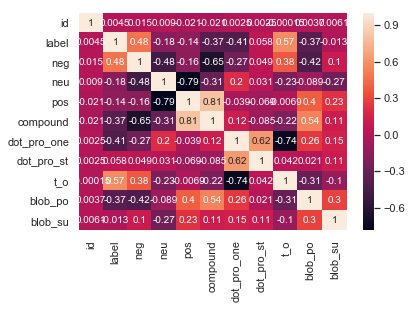

In [34]:
sns.heatmap(train.corr(), annot = True)

In [39]:
# All these features can now be used as input into ML algorithms to check the performance
train_co = train[['label','neg','neu','pos','compound','dot_pro_one','dot_pro_st','t_o','blob_po','blob_su']]
test_co = test[['neg','neu','pos','compound','dot_pro_one','dot_pro_st','t_o','blob_po','blob_su']]

In [40]:
print (train.shape)
print (test.shape)

(7920, 14)
(1953, 13)


C:\Users\9020\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\9020\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\9020\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\9020\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


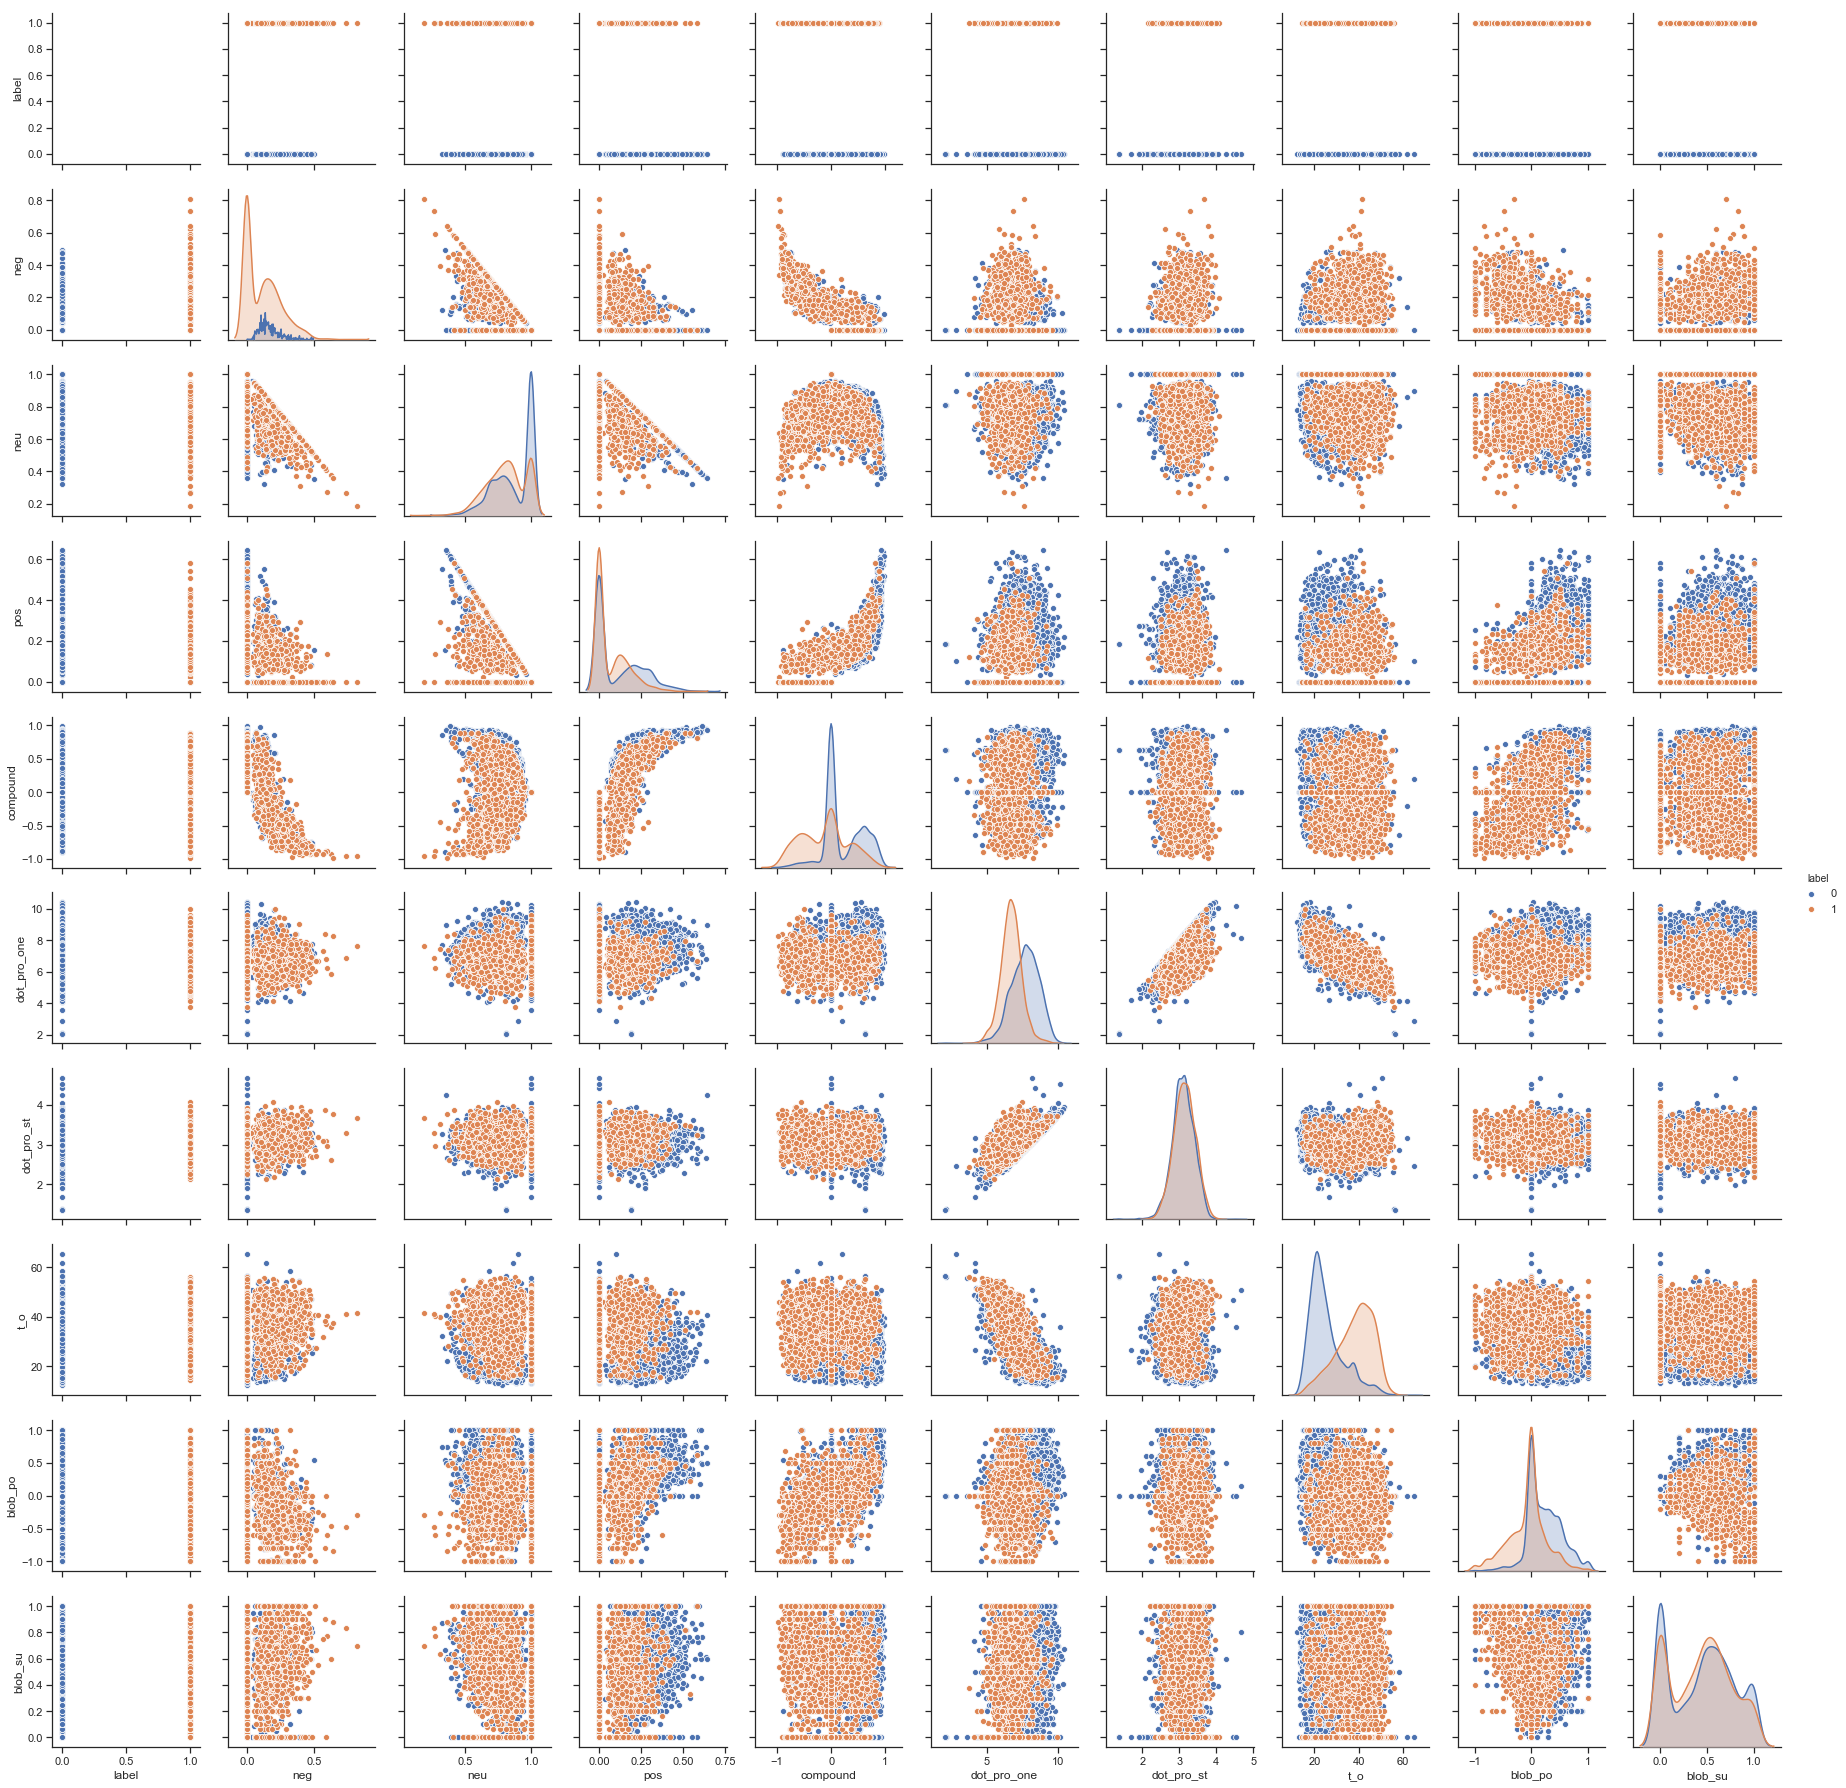

In [41]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
train_co
sns.pairplot(train_co, hue = 'label')

In [42]:
X = train_co.drop('label', axis = 1)
y = train_co.label
print (X.shape)
print (y.shape)

(7920, 9)
(7920,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print (X_train.shape)
print (X_test.shape)

(5940, 9)
(1980, 9)


In [44]:
# Using Random Forest Classifier to determine the importance of the features
clf = RandomForestClassifier(n_estimators=500, random_state = 1)
model = clf.fit(X_train, y_train)
model.feature_importances_

array([0.11682293, 0.04862732, 0.04607728, 0.1085974 , 0.14446333,
       0.10836359, 0.28782809, 0.08976616, 0.04945392])

In [45]:
X.columns

Index(['neg', 'neu', 'pos', 'compound', 'dot_pro_one', 'dot_pro_st', 't_o',
       'blob_po', 'blob_su'],
      dtype='object')

In [46]:
# Dataframe with the features arranged in order of decreasing importance
im = pd.DataFrame({'Features':X.columns, 'Importance Score':model.feature_importances_ })
im.sort_values(by = 'Importance Score', ascending = False, inplace = True)
im

,Features,Importance Score
6,t_o,0.287828
4,dot_pro_one,0.144463
0,neg,0.116823
3,compound,0.108597
5,dot_pro_st,0.108364
7,blob_po,0.089766
8,blob_su,0.049454
1,neu,0.048627
2,pos,0.046077


In [47]:
# Selecting the features in order of importance, so that they can be used for further analysis
one_fe = ['t_o']
two_fe = ['t_o', 'dot_pro_one']
three_fe = ['t_o', 'dot_pro_one', 'neg']
four_fe = ['t_o', 'dot_pro_one', 'neg', 'compound']
five_fe = ['t_o', 'dot_pro_one', 'neg', 'compound', 'dot_pro_st']
six_fe = ['t_o', 'dot_pro_one', 'neg', 'compound', 'dot_pro_st', 'blob_po']
seven_fe = ['t_o', 'dot_pro_one', 'neg', 'compound', 'dot_pro_st', 'blob_po', 'blob_su']
eight_fe = ['t_o', 'dot_pro_one', 'neg', 'compound', 'dot_pro_st', 'blob_po', 'blob_su', 'neu']
nine_fe = ['t_o', 'dot_pro_one', 'neg', 'compound', 'dot_pro_st', 'blob_po', 'blob_su', 'neu', 'pos']

In [48]:
def importance_test(feat):
    '''
    The function is used to check the performance of the selected features 
    so that the optimum number of features can be used in the subsequent analysis
    '''
    print ("Features used: ")
    print (feat)
    print ()
    X_train_sub = X_train[feat]
    X_test_sub = X_test[feat]
    clf = RandomForestClassifier(n_estimators=500, random_state = 1)
    print ("Model: ")
    print (clf)
    print ()
    model = clf.fit(X_train_sub, y_train)    
    y_pred_prob = model.predict_proba(X_test_sub)[:, 1]
    y_pred_class = model.predict(X_test_sub)
    print ('AUC: ', metrics.roc_auc_score(y_test, y_pred_prob))
    print ()
    print ('Matrix: \n', metrics.confusion_matrix (y_test, y_pred_class))
    print ()
    print ('Report: \n', metrics.classification_report (y_test, y_pred_class))
    print ()
    print ('f1-score: \n', metrics.f1_score(y_test, y_pred_class, average = 'weighted'))
    
    print('=====================================================================')
    return None

In [49]:
importance_test(one_fe)
importance_test(two_fe)
importance_test(three_fe)
importance_test(four_fe)
importance_test(five_fe)
importance_test(six_fe)
importance_test(seven_fe)
importance_test(eight_fe)
importance_test(nine_fe)

Features used: 
['t_o']

Model: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

AUC:  0.8003669779168749

Matrix: 
 [[1224  218]
 [ 263  275]]

Report: 
              precision    recall  f1-score   support

          0       0.82      0.85      0.84      1442
          1       0.56      0.51      0.53       538

avg / total       0.75      0.76      0.75      1980


f1-score: 
 0.7536352812511259
Features used: 
['t_o', 'dot_pro_one']

Model: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_i

In [50]:
# Since seven features gave the best performance
# Subsequent analysis will make use of the seven features
X_train_sub = train_co[seven_fe]
y_train = train_co['label']

In [51]:
print (X_train_sub.shape)
print (y_train.shape)

(7920, 7)
(7920,)


In [52]:
X_train_sub.head(1)

,t_o,dot_pro_one,neg,compound,dot_pro_st,blob_po,blob_su
0,23.16529,9.204599,0.0,0.0,3.613477,0.675,1.0


In [53]:
y_train.head(1)

0    0
Name: label, dtype: int64

In [ ]:
# Subsequent analysis will use the seven features
# Grid search was used to optimise the value of the hyper parameters to be used for the different algorithms

In [54]:
param_grid = [{'kernel':['rbf', 'linear'], 'C':[0.5, 1, 10, 100]}]
grid_search = GridSearchCV(SVC(), param_grid, cv = 3, scoring='f1')
grid_search.fit(X_train_sub, y_train)
print ('SVC best parameter: ', grid_search.best_params_)

SVC best parameter:  {'C': 100, 'kernel': 'rbf'}


In [55]:
param_grid = [{'kernel':['rbf', 'linear'], 'nu':[0.1, 0.5]}]
grid_search = GridSearchCV(NuSVC(), param_grid, cv = 3, scoring='f1')
grid_search.fit(X_train_sub, y_train)
print ('NuSVC best parameter: ', grid_search.best_params_)

NuSVC best parameter:  {'kernel': 'linear', 'nu': 0.5}


In [56]:
ite = [i for i in range(5, 200, 5)]
param_grid = [{'n_neighbors': ite}]
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 3, scoring='f1')
grid_search.fit(X_train_sub, y_train)
print ('KNN best parameter: ', grid_search.best_params_)

KNN best parameter:  {'n_neighbors': 45}


In [57]:
param_grid = [{'alpha':[0.5, 1, 10]}]
grid_search = GridSearchCV(BernoulliNB(), param_grid, cv = 3, scoring='f1')
grid_search.fit(X_train_sub, y_train)
print ('BernoulliNB best parameter: ', grid_search.best_params_)

BernoulliNB best parameter:  {'alpha': 0.5}


In [58]:
param_grid = [{'n_estimators':[50, 100, 200], 'algorithm':['SAMME', 'SAMME.R']}]
grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv = 3, scoring='f1')
grid_search.fit(X_train_sub, y_train)
print ('AdaBoostClassifier best parameter: ', grid_search.best_params_)

AdaBoostClassifier best parameter:  {'algorithm': 'SAMME.R', 'n_estimators': 200}


In [59]:
param_grid = [{'n_estimators':[50, 100, 200]}]
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 3, scoring='f1')
grid_search.fit(X_train_sub, y_train)
print ('GradientBoostingClassifier best parameter: ', grid_search.best_params_)

GradientBoostingClassifier best parameter:  {'n_estimators': 50}


In [60]:
param_grid = [{'solver':['svd', 'eigen']}]
grid_search = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, cv = 3, scoring='f1')
grid_search.fit(X_train_sub, y_train)
print ('LinearDiscriminantAnalysis best parameter: ', grid_search.best_params_)

C:\Users\9020\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\9020\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\9020\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\9020\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\9020\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetri

LinearDiscriminantAnalysis best parameter:  {'solver': 'svd'}


In [61]:
X_train_sub = train_co[seven_fe]
y_train = train_co['label']
X_test_sub = test_co[seven_fe]

In [63]:
print (X_train_sub.shape)
print (y_train.shape)
print (X_test_sub.shape)

(7920, 7)
(7920,)
(1953, 7)


In [64]:
def model_feature_test(model):
    '''
    This function is used to evaluate the performance of the best parameters for the different algorithms
    determined previously
    The final form can be submitted to the Analytics Vidhya websites
    ''' 
    # X_traindata_dtm = vec.fit_transform(train.tweet)
    model.fit(X_train_sub, y_train)
    # X_testdata_dtm = vec.transform(test.tweet)
    y_result = model.predict(X_test_sub)
    
    D = pd.DataFrame({'id':[i for i in range(7921, 9874)], 'label':y_result})
    D.to_csv('Result.csv', index=False)

In [65]:
# F1-score = 0.843685460064436
model_feature_test(RandomForestClassifier(n_estimators=500))

In [66]:
# F1-score = 0.834230377484375
model_feature_test(SVC(C=10, kernel='rbf'))

In [67]:
# F1-score = 0.79014639311457
model_feature_test(NuSVC(nu = 0.5, kernel='linear'))

In [68]:
# F1-score = 0.811852886977981
model_feature_test(KNeighborsClassifier(n_neighbors=45))

In [69]:
# F1-score = 0.778201168179967
model_feature_test(BernoulliNB(alpha = 0.5))

In [70]:
# F1-score = 0.844565631449179
model_feature_test(AdaBoostClassifier(algorithm='SAMME.R', n_estimators=200))

In [71]:
# F1-score =  0.838212654872538
model_feature_test(GradientBoostingClassifier(n_estimators=50))

In [72]:
# F1-score = 0.825171273629811
model_feature_test(LinearDiscriminantAnalysis(solver='svd'))